## Kaggle üzerinden alınan gerçek bir araba veri seti ile uygulama gerçekleştireceğiz:

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [62]:
dataFrame=pd.read_excel("merc.xlsx")

In [63]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [64]:
# Veriyi anlamaya çalışmak
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [65]:
# Veride null veri var mı? Ona bakalım:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [66]:
# Görüldüğü üzere veride eksik yok.

## Verideki fiyat parametresinin dağılım (distrubution) grafiğine bakalım:

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

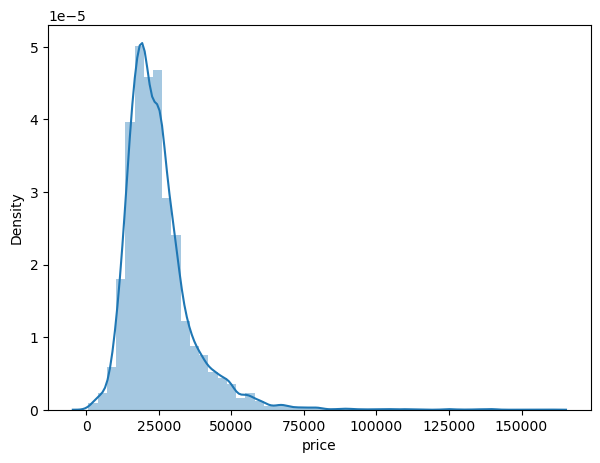

In [67]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"])

## Grafiğe baktığımızda görüyoruz ki sağa doğru sıfır ekseninde bir ilerleme var. Yani pahalı araba bantlarında durum kötü ve bu bize probleme sebep olabilir. Yani pahalı arabalardan bir kaç tane atıp yolumuza devam etmek bize bir şey kaybettirmez.

### Yıllara göre araba dağılımına da bakalım:

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

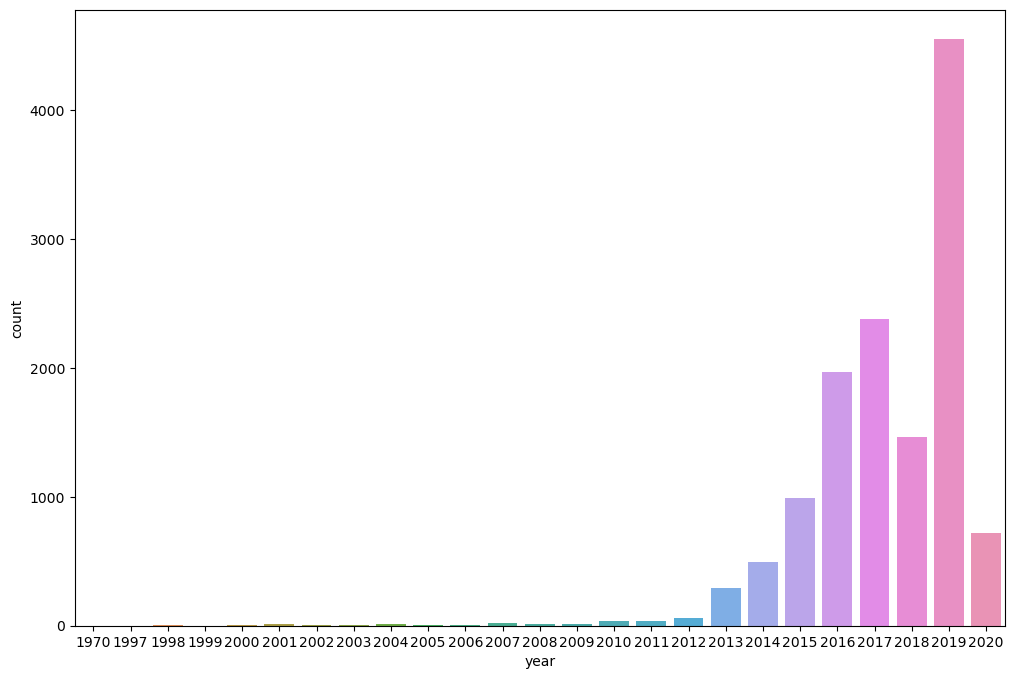

In [68]:
plt.figure(figsize=(12,8))
sbn.countplot(dataFrame["year"])

## Verilerin birbiri arasında korelasyonuna bakalım:

In [69]:
dataFrame.corr()                                                   #corr=Korelasyon

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [70]:
# Sadece fiyatlarla ilgili olanı almak istersek:
dataFrame.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

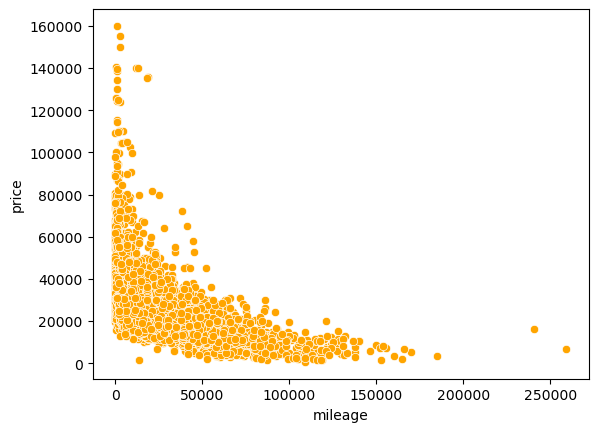

In [71]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame,color="orange")                   #parametre olarak bir x, bir y ve bir data veriyoruz.

### Gördüğümüz üzere beklendik bir grafik çıktı. Mileage yani kullanım klometresi arttıkça fiyat da düşüyor.

## Pahalı fiyatları bir görelim :

In [72]:
dataFrame.sort_values("price",ascending=False).head(20)       #ascending in false olması en yüksek fiyatı en yukarda getirecek.

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


## Çok yüksek fiyata sahip arabaların bizim modelimizi bozabileceği tahminini ilk grafikten çıkarmıştık.Bu yüzden ne kadar veri varsa bunun yüzde 99 unu alalım. Verinin yüzde 99 unu almak o verinin yapısını bozmadan almamızı sağlar.

In [73]:
len(dataFrame)

13119

In [74]:
# 13.119 veri var

In [75]:
len(dataFrame)*0.01 

131.19

## Bu verinin yüzde 99 unu almak yani yüzde 1 ini çıkarmak bize bir şey kaybettirmez. En yüksek fiyatlı arabalardan 131 veriyi atabiliriz :

In [76]:
dataFrameYüzdeDoksanDokuzu=dataFrame.sort_values("price",ascending=False).iloc[131:]

In [77]:
dataFrameYüzdeDoksanDokuzu.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


## Yüksek fiyatlardan atılmış haliyle yeniden çizdirelim: 

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

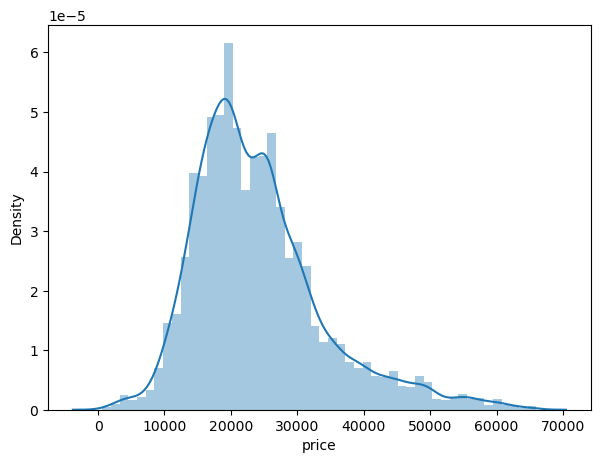

In [78]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrameYüzdeDoksanDokuzu["price"])

In [79]:
dataFrame.groupby("year").mean()["price"]                #orjinal dataFrame yıllara göre gruplanıp ortalaması alındı

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [80]:
dataFrameYüzdeDoksanDokuzu.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

## Burada farkedildiği üzere 1970 yılındaki bir aracın ortalama 25 bin değerine satılıyor olması biraz uçuk bir değer ve bu bir istenmeyen durum. İstersek bunu da atabiliriz .

In [81]:
dataFrame[dataFrame.year!=1970 ].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [82]:
dataFrame=dataFrameYüzdeDoksanDokuzu

In [83]:
dataFrame.describe()                                #orjinal veri, verinin %99 una eşitlendi.

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [84]:
dataFrame=dataFrame[dataFrame.year!=1970]

In [85]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

## Veri temizliğimizi bitirmeden veride gereksiz olan bir kolon daha var. Oda transmission kolonu. Bunu bu şekilde modele regresyona aldığımızda numerik bir kolon olmadığından ötürü hata alınacaktır. 

In [86]:
dataFrame.head(5)

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


## Tranmission kolonunu atalım :

In [87]:
dataFrame=dataFrame.drop("transmission",axis=1)

In [88]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


## Kolonda atıldı ve veri temizliği tamamlandı. Artık verimiz regresyona girmeye hazır :

## x ve y değerlerini yazalım :

In [89]:
x=dataFrame.drop("price",axis=1).values                           # price harici tüm parametreler ---->x
y=dataFrame["price"].values

In [90]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [91]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=10)

In [94]:
len(x_train)

9090

In [95]:
len(x_test)

3897

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler=MinMaxScaler()

In [98]:
x_train=scaler.fit_transform(x_train)

In [99]:
x_test=scaler.transform(x_test)

In [100]:
from tensorflow.keras.models import Sequential         # Modeli oluşturuyoruz.
from tensorflow.keras.layers import Dense              # Katmanları oluşturuyoruz.

In [101]:
model=Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))                                    # Çıkış katmanına 1 katman eklnedi.
model.compile(optimizer="adam",loss="mse")

## Modeli oluşturduk. Şimdi modeli eğitelim :

In [102]:
model.fit(x=x_train, y=y_train,validation_data=(x_test,y_test),batch_size=250, epochs=300)

Epoch 1/300
37/37 [==============================] - 2s 14ms/step - loss: 672145088.0000 - val_loss: 688103680.0000
Epoch 2/300
37/37 [==============================] - 0s 6ms/step - loss: 672122688.0000 - val_loss: 688061120.0000
Epoch 3/300
37/37 [==============================] - 0s 6ms/step - loss: 672039424.0000 - val_loss: 687911744.0000
Epoch 4/300
37/37 [==============================] - 0s 6ms/step - loss: 671783552.0000 - val_loss: 687489728.0000
Epoch 5/300
37/37 [==============================] - 0s 6ms/step - loss: 671098816.0000 - val_loss: 686394880.0000
Epoch 6/300
37/37 [==============================] - 0s 6ms/step - loss: 669403904.0000 - val_loss: 683803328.0000
Epoch 7/300
37/37 [==============================] - 0s 5ms/step - loss: 665627648.0000 - val_loss: 678345408.0000
Epoch 8/300
37/37 [==============================] - 0s 5ms/step - loss: 658143424.0000 - val_loss: 668003328.0000
Epoch 9/300
37/37 [==============================] - 0s 5ms/step - loss: 644640

37/37 [==============================] - 0s 6ms/step - loss: 66099660.0000 - val_loss: 67537624.0000
Epoch 73/300
37/37 [==============================] - 0s 6ms/step - loss: 65638932.0000 - val_loss: 67093732.0000
Epoch 74/300
37/37 [==============================] - 0s 6ms/step - loss: 65176084.0000 - val_loss: 66647700.0000
Epoch 75/300
37/37 [==============================] - 0s 6ms/step - loss: 64731032.0000 - val_loss: 66184468.0000
Epoch 76/300
37/37 [==============================] - 0s 6ms/step - loss: 64263880.0000 - val_loss: 65727960.0000
Epoch 77/300
37/37 [==============================] - 0s 6ms/step - loss: 63797480.0000 - val_loss: 65246732.0000
Epoch 78/300
37/37 [==============================] - 0s 6ms/step - loss: 63315908.0000 - val_loss: 64796640.0000
Epoch 79/300
37/37 [==============================] - 0s 6ms/step - loss: 62838636.0000 - val_loss: 64301428.0000
Epoch 80/300
37/37 [==============================] - 0s 6ms/step - loss: 62344716.0000 - val_loss: 6

37/37 [==============================] - 0s 5ms/step - loss: 26168212.0000 - val_loss: 27119458.0000
Epoch 144/300
37/37 [==============================] - 0s 6ms/step - loss: 25901286.0000 - val_loss: 26866204.0000
Epoch 145/300
37/37 [==============================] - 0s 6ms/step - loss: 25687102.0000 - val_loss: 26635642.0000
Epoch 146/300
37/37 [==============================] - 0s 6ms/step - loss: 25443666.0000 - val_loss: 26464528.0000
Epoch 147/300
37/37 [==============================] - 0s 6ms/step - loss: 25234510.0000 - val_loss: 26218672.0000
Epoch 148/300
37/37 [==============================] - 0s 6ms/step - loss: 25035458.0000 - val_loss: 26077652.0000
Epoch 149/300
37/37 [==============================] - 0s 6ms/step - loss: 24858732.0000 - val_loss: 25867894.0000
Epoch 150/300
37/37 [==============================] - 0s 6ms/step - loss: 24673738.0000 - val_loss: 25699352.0000
Epoch 151/300
37/37 [==============================] - 0s 6ms/step - loss: 24535906.0000 - val

37/37 [==============================] - 0s 6ms/step - loss: 20739618.0000 - val_loss: 22027144.0000
Epoch 215/300
37/37 [==============================] - 0s 6ms/step - loss: 20705518.0000 - val_loss: 21991096.0000
Epoch 216/300
37/37 [==============================] - 0s 6ms/step - loss: 20678934.0000 - val_loss: 21975756.0000
Epoch 217/300
37/37 [==============================] - 0s 6ms/step - loss: 20655602.0000 - val_loss: 21952996.0000
Epoch 218/300
37/37 [==============================] - 0s 6ms/step - loss: 20634940.0000 - val_loss: 21920446.0000
Epoch 219/300
37/37 [==============================] - 0s 6ms/step - loss: 20597068.0000 - val_loss: 21912126.0000
Epoch 220/300
37/37 [==============================] - 0s 6ms/step - loss: 20556408.0000 - val_loss: 21882256.0000
Epoch 221/300
37/37 [==============================] - 0s 6ms/step - loss: 20546472.0000 - val_loss: 21871994.0000
Epoch 222/300
37/37 [==============================] - 0s 6ms/step - loss: 20507868.0000 - val

37/37 [==============================] - 0s 6ms/step - loss: 19353304.0000 - val_loss: 20810356.0000
Epoch 286/300
37/37 [==============================] - 0s 6ms/step - loss: 19346398.0000 - val_loss: 20789650.0000
Epoch 287/300
37/37 [==============================] - 0s 6ms/step - loss: 19331680.0000 - val_loss: 20790570.0000
Epoch 288/300
37/37 [==============================] - 0s 6ms/step - loss: 19315750.0000 - val_loss: 20775080.0000
Epoch 289/300
37/37 [==============================] - 0s 5ms/step - loss: 19322110.0000 - val_loss: 20817316.0000
Epoch 290/300
37/37 [==============================] - 0s 6ms/step - loss: 19320804.0000 - val_loss: 20776134.0000
Epoch 291/300
37/37 [==============================] - 0s 6ms/step - loss: 19320412.0000 - val_loss: 20772186.0000
Epoch 292/300
37/37 [==============================] - 0s 6ms/step - loss: 19291046.0000 - val_loss: 20755232.0000
Epoch 293/300
37/37 [==============================] - 0s 6ms/step - loss: 19263758.0000 - val

## Validation data diyerek test datasını da model eğitilirken vermiş olduk. Bu işlem sonrasında manuel olarak yaptığımız kısmı bizim için kolaylaştırıyor. Validation loss terimi de test verisindeki kayıplardan bahsediyor. Bunları böyle değerlerden incelemek zor. Bu yğzden grafiğe dökelim :

In [103]:
kayıpVerisi=pd.DataFrame(model.history.history)

In [104]:
kayıpVerisi.head()

,loss,val_loss
0,672145088.0,688103680.0
1,672122688.0,688061120.0
2,672039424.0,687911744.0
3,671783552.0,687489728.0
4,671098816.0,686394880.0


<AxesSubplot:>

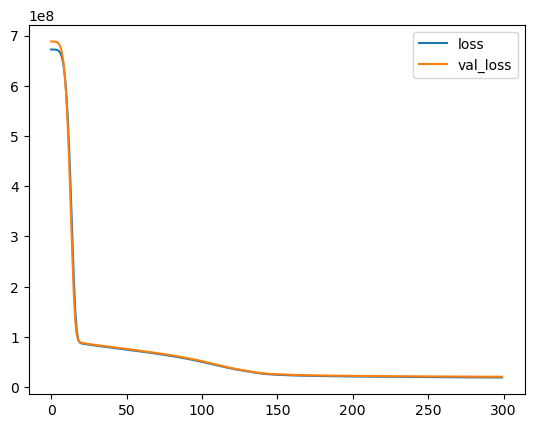

In [105]:
kayıpVerisi.plot()

## Bu grafikte bakmamız gereken ilk durum : Kayıplar azalıyor mu ----> evet
## Diğer durum : loss ve validation loss birlikte haraket ediyor mu ---> evet

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [109]:
tahminDizisi=model.predict(x_test)

122/122 [==============================] - 1s 3ms/step


In [110]:
tahminDizisi

array([[22297.516],
       [23864.656],
       [25202.414],
       ...,
       [26518.766],
       [11435.76 ],
       [25051.434]], dtype=float32)

## Benim elimde gerçek y ler var. y_test ile hata oranına bakalım :

In [111]:
mean_absolute_error(y_test,tahminDizisi)

3227.0062076215227

#### Fiyatlardan 3227 pound gibi bir sapma olacağı sonucuna varıyoruz. Bu değerin iyi mi kötü mü olduğu ya da kullanılabilir mi kulanılamaz mı olduğunu veri sahibi ya da kullanıcı belirler. Değiştirmek istersek geriye dönüp veriyi daha iyi temizleyebilir, epoch değerini değiştirebilir, katman sayısını artırabilir gibi işlemleri gerçekleştirebiliriz. Tabi ki bunları yaparken de overfitting (aşırı öğrenme/ ezberleme) durumuna sebep olmadan.

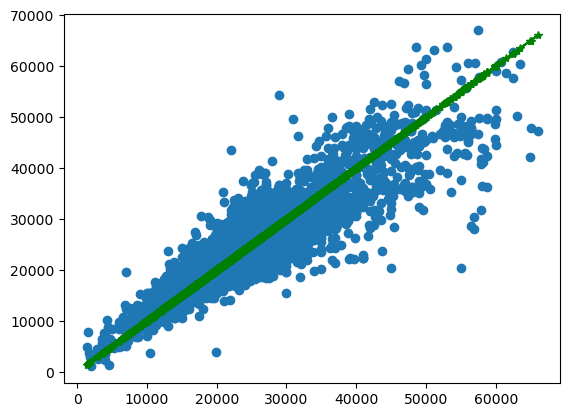

In [114]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [115]:
## Çıkan sonucu değerlendirecek olursak fena değil denilebilir.